In [9]:
from pathlib import Path
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [10]:
df = pd.read_csv('dip_k0.csv', dtype=np.float64)
df

,QD1.1_K1L,QD1.1_DX,QD1.1_DY,QD1.1_DPSI,QF1.1_K1L,QF1.1_DX,QF1.1_DY,QF1.1_DPSI,M2A.1_K0L,M2A.1_DPSI,...,BPMV2.4,BPMH2.4,BPMV3.4,BPMH3.4,BPMV4.4,BPMH4.4,BPMV5.4,BPMH5.4,BPMV6.4,BPMH6.4
0,-0.000069,-0.000063,-0.000157,0.000020,-0.000231,-0.000034,0.000026,-0.000098,-0.000093,0.000163,...,0.004801,0.004113,0.001781,-0.000842,-0.003998,-0.003492,-0.003562,-0.000867,0.001912,0.002484
1,0.000472,-0.000091,-0.000162,-0.000063,0.000020,0.000089,0.000002,-0.000078,0.000100,0.000166,...,0.003606,0.005787,-0.000163,0.002376,-0.003596,-0.004997,-0.000982,-0.003407,0.003126,0.005329
2,-0.000012,0.000051,-0.000043,0.000207,0.000322,-0.000114,0.000138,-0.000060,-0.000145,0.000094,...,-0.000212,0.000307,0.000740,-0.002094,0.000018,-0.002128,-0.000302,-0.000365,-0.000299,-0.000815
3,-0.000464,-0.000136,-0.000086,-0.000072,-0.000139,-0.000019,0.000115,-0.000030,0.000058,-0.000057,...,-0.001146,0.003855,-0.000823,0.006970,0.000718,-0.002118,0.001236,-0.008656,-0.000506,-0.001114
4,-0.000661,0.000028,0.000122,0.000042,0.000391,0.000011,-0.000057,0.000074,0.000177,-0.000058,...,0.001468,-0.002343,-0.002432,0.005371,-0.003191,0.005320,0.000738,-0.000653,0.004196,-0.004255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.000251,0.000175,-0.000013,-0.000061,0.000271,-0.000008,0.000059,-0.000171,-0.000073,0.000040,...,0.004191,-0.002777,-0.000013,-0.002555,-0.003799,0.001260,-0.001572,0.001469,0.002899,-0.000294
149996,0.000413,0.000054,0.000015,0.000054,-0.000057,-0.000015,-0.000108,0.000065,-0.000019,0.000062,...,-0.003211,0.003713,0.000998,0.002019,0.003058,-0.002388,0.000049,-0.002468,-0.003711,0.000059
149997,-0.000283,-0.000016,0.000022,0.000027,-0.000199,0.000004,0.000017,0.000024,0.000153,-0.000158,...,0.003338,0.000559,0.000026,-0.000362,-0.003247,-0.001288,-0.001403,0.000419,0.002151,0.001277
149998,0.000144,0.000030,0.000007,-0.000087,-0.000500,0.000037,0.000030,0.000060,-0.000139,0.000031,...,0.000331,0.000842,-0.000727,-0.005233,-0.000506,-0.003598,0.000148,0.001985,-0.000113,0.003916


In [11]:
df.loc[:, (df != 0).any(axis=0)].corr().to_csv("corr_matrix.csv")
df.shape

(150000, 320)

In [12]:
def print_result(y_train=[0,0], y_train_pred=[0,0], y_test=0, y_test_pred=0):    
    print(
            "RMSE при обучении:%f , при испытании: %f"
            % (
                mean_squared_error(y_train, y_train_pred, squared=False),
                mean_squared_error(y_test, y_test_pred, squared=False),
            )
        )

    print(
        "R^2 при обучении:%f, при испытании:%f"
        % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
    )

In [13]:
y = df.iloc[:, 0:272]
X = df.iloc[:, 272:320]

In [14]:
y = y.loc[:, (y != 0).any(axis=0)]
y.head()


,QD1.1_K1L,QD1.1_DX,QD1.1_DY,QD1.1_DPSI,QF1.1_K1L,QF1.1_DX,QF1.1_DY,QF1.1_DPSI,M2A.1_K0L,M2A.1_DPSI,...,M6B.4_K0L,M6B.4_DPSI,QD6.4_K1L,QD6.4_DX,QD6.4_DY,QD6.4_DPSI,QF6.4_K1L,QF6.4_DX,QF6.4_DY,QF6.4_DPSI
0,-0.000069,-0.000063,-0.000157,0.000020,-0.000231,-0.000034,0.000026,-0.000098,-0.000093,0.000163,...,0.000143,0.000115,-0.000083,0.000028,-0.000085,-0.000038,0.000723,-0.000137,0.000082,-0.000004
1,0.000472,-0.000091,-0.000162,-0.000063,0.000020,0.000089,0.000002,-0.000078,0.000100,0.000166,...,-0.000092,-0.000052,-0.000120,0.000133,0.000067,0.000132,-0.000107,0.000039,-0.000049,0.000029
2,-0.000012,0.000051,-0.000043,0.000207,0.000322,-0.000114,0.000138,-0.000060,-0.000145,0.000094,...,-0.000150,0.000181,-0.000214,-0.000011,-0.000130,-0.000085,-0.000034,-0.000110,0.000073,0.000020
3,-0.000464,-0.000136,-0.000086,-0.000072,-0.000139,-0.000019,0.000115,-0.000030,0.000058,-0.000057,...,-0.000068,-0.000037,0.000716,0.000071,0.000015,0.000132,-0.000037,-0.000024,-0.000006,0.000171
4,-0.000661,0.000028,0.000122,0.000042,0.000391,0.000011,-0.000057,0.000074,0.000177,-0.000058,...,0.000098,0.000035,0.000370,0.000126,0.000003,-0.000043,0.000158,0.000194,0.000003,0.000162


In [15]:
X = X.iloc[:, 0:48:2]
X

,BPMV1.1,BPMV2.1,BPMV3.1,BPMV4.1,BPMV5.1,BPMV6.1,BPMV1.2,BPMV2.2,BPMV3.2,BPMV4.2,...,BPMV3.3,BPMV4.3,BPMV5.3,BPMV6.3,BPMV1.4,BPMV2.4,BPMV3.4,BPMV4.4,BPMV5.4,BPMV6.4
0,0.003970,-0.000504,-0.004611,-0.002597,0.003117,0.003979,-0.001544,-0.005261,-0.000900,0.005635,...,0.004936,0.002423,-0.003472,-0.004788,0.000786,0.004801,0.001781,-0.003998,-0.003562,0.001912
1,0.003243,-0.002002,-0.004766,-0.001240,0.004183,0.003389,-0.002481,-0.003958,-0.000851,0.002499,...,0.002614,0.001870,-0.001855,-0.002896,0.001371,0.003606,-0.000163,-0.003596,-0.000982,0.003126
2,-0.000831,-0.000800,-0.000180,0.000935,0.000545,-0.001042,-0.001348,0.000140,0.000763,0.000533,...,0.000862,0.001224,-0.000466,-0.001135,-0.000539,-0.000212,0.000740,0.000018,-0.000302,-0.000299
3,-0.001474,-0.001005,0.000188,0.000463,0.000198,-0.000866,0.000330,0.000667,0.000495,0.000200,...,-0.001415,-0.002028,-0.000192,0.001842,0.000597,-0.001146,-0.000823,0.000718,0.001236,-0.000506
4,0.001859,-0.002441,-0.002597,0.001470,0.003754,-0.000262,-0.003295,-0.000558,0.003406,0.002587,...,0.002110,-0.002829,-0.004388,-0.000125,0.003353,0.001468,-0.002432,-0.003191,0.000738,0.004196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.001452,-0.002368,-0.002972,0.000771,0.003474,0.001468,-0.003051,-0.004017,0.000812,0.004142,...,0.003857,0.000542,-0.004161,-0.002986,0.002597,0.004191,-0.000013,-0.003799,-0.001572,0.002899
149996,-0.002059,0.002861,0.004188,-0.000063,-0.004367,-0.001392,0.003795,0.003064,-0.002489,-0.004100,...,-0.003895,0.000208,0.004011,0.001705,-0.003270,-0.003211,0.000998,0.003058,0.000049,-0.003711
149997,0.002350,-0.000695,-0.002520,-0.000035,0.002484,0.001401,-0.001857,-0.002720,0.000343,0.002559,...,0.002010,0.000070,-0.002263,-0.001487,0.002250,0.003338,0.000026,-0.003247,-0.001403,0.002151
149998,-0.000932,-0.000592,-0.000063,0.000547,0.000828,0.000138,-0.001174,-0.000777,0.000717,0.001054,...,-0.000475,-0.001778,-0.000847,0.000733,0.000816,0.000331,-0.000727,-0.000506,0.000148,-0.000113


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


In [17]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print_result(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_test_pred=y_test_pred)

RMSE при обучении:0.000131 , при испытании: 0.000131
R^2 при обучении:0.088385, при испытании:0.087931


In [18]:
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=42
    )
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print_result(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_test_pred=y_test_pred)

RMSE при обучении:0.000131 , при испытании: 0.000131
R^2 при обучении:0.088394, при испытании:0.087970


In [19]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

class Dataset():
    def __init__(self, data, X, y):
        dataset = data
        self.labels = dataset.columns.values
        # poly_features = PolynomialFeatures(degree=2, include_bias=False)
        # X = poly_features.fit_transform(X)

        self.y = y
        self.scX = MinMaxScaler()
        self.scy = MinMaxScaler()
        X_std = self.scX.fit_transform(X)
        y_std = self.scy.fit_transform(self.y)

        self.y_std_m = y_std * 0.8
        self.y_std_2 = y_std
                
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X_std,
                                                     y_std, 
                                                     test_size=0.3, 
                                                     random_state=1)

    def get_data(self):
        return self.X_train, self.X_test, self.y_train, self.y_test

    def get_mae(self):
        return mean_absolute_error(self.y_std_m, self.y_std_2)

    def get_rmse(self):
        return mean_squared_error(self.y_std_m, self.y_std_2)

    def get_r2(self):
        return r2_score(self.y_std_m, self.y_std_2)

    def inverse_transform_y(self, y):
        return self.scy.inverse_transform(y)

    def get_y(self):
        return self.inverse_transform_y(self.y_test)

    def get_labels(self):
        return self.labels


In [25]:
def build_and_compile_model():
    model = keras.Sequential([
        layers.Dense(160, name="hidden1", activation=tf.keras.activations.softsign),
        layers.Dense(160, name="hidden2", activation=tf.keras.activations.softsign),
        layers.Dense(160 , name="hidden3", activation=tf.keras.activations.softsign),
        #layers.Dense(180, name="hidden4", activation=tf.keras.activations.softsign),#'tanh'), 
        layers.Dense(272, name="outputs")
    ])
    initial_learning_rate = 0.01
    lr_schedule = 0.01
    tf.keras.optimizers.schedules.ExponentialDecay(
         initial_learning_rate,
         decay_steps=10000,
         decay_rate=1,
         staircase=True)

    # tf.keras.optimizers.Adam
    model.compile(optimizer='adam', loss='mse')#, metrics=['mae'])
    return model

In [26]:
def get_results(y, y_pred):
    loss = mean_squared_error(y, y_pred)
    loss_r2 = r2_score(y, y_pred)
    return {'MSE':loss, 'R2':loss_r2}

In [27]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

MAE: 0.0999551114701263
RMSE: 0.010514752421983466
R^2: -0.3178079997568356
Epoch 1/200
2297/2297 - 5s - loss: 0.0131 - val_loss: 0.0120 - 5s/epoch - 2ms/step
Epoch 2/200
2297/2297 - 4s - loss: 0.0118 - val_loss: 0.0117 - 4s/epoch - 2ms/step
Epoch 3/200
2297/2297 - 4s - loss: 0.0117 - val_loss: 0.0117 - 4s/epoch - 2ms/step
Epoch 4/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 5/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 6/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 7/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 8/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 9/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 10/200
2297/2297 - 4s - loss: 0.0116 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 11/200
2297/2297 - 4s - loss: 0.0115 - val_loss: 0.0116 - 4s/epoch - 2ms/step
Epoch 12/

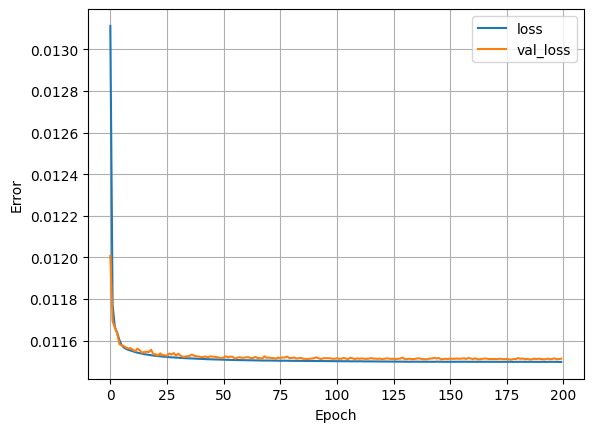

1407/1407 [==============================] - 2s 1ms/step


In [28]:
ds = Dataset(df, X, y)
print('MAE:', ds.get_mae())
print('RMSE:', ds.get_rmse())
print('R^2:', ds.get_r2())
X_train, X_test, y_train, y_test = ds.get_data()
knl_model = build_and_compile_model()

history = knl_model.fit(
X_train,
y_train,
validation_split=0.3,
verbose=2, epochs=200)

labels = ds.get_labels()
plot_loss(history)
y_pred = knl_model.predict(X_test)


In [29]:
print(
            "RMSE: %f, R^2: %f, MAE: %f"
            % (
                
                mean_squared_error(y_test, y_pred),
                r2_score(y_test, y_pred),
                mean_absolute_error(y_test, y_pred)
            )
        )

RMSE: 0.011494, R^2: 0.086324, MAE: 0.084750


In [30]:
results = {"dipole": [], 'RMSE': [], 'R^2': [], 'MAE': []}
for i in range(y_pred.shape[1]):
    print(
            "dipole: %s, RMSE: %f, R^2: %f, MAE: %f"
            % (
                y.columns[i],
                mean_squared_error(y_test[i,:], y_pred[i,:]),
                r2_score(y_test[i,:], y_pred[i,:]),
                mean_absolute_error(y_test[i,:], y_pred[i,:])
            )
        )

    results['dipole'].append(y.columns[i])
    results['RMSE'].append(mean_squared_error(y_test[i,:], y_pred[i,:]))
    results['R^2'].append(r2_score(y_test[i,:], y_pred[i,:]))
    results['MAE'].append(mean_absolute_error(y_test[i,:], y_pred[i,:]))

dipole: QD1.1_K1L, RMSE: 0.011180, R^2: 0.211245, MAE: 0.083888
dipole: QD1.1_DX, RMSE: 0.012006, R^2: 0.092941, MAE: 0.085274
dipole: QD1.1_DY, RMSE: 0.013267, R^2: 0.068811, MAE: 0.088917
dipole: QD1.1_DPSI, RMSE: 0.011896, R^2: 0.106281, MAE: 0.088320
dipole: QF1.1_K1L, RMSE: 0.011655, R^2: 0.094625, MAE: 0.086402
dipole: QF1.1_DX, RMSE: 0.011524, R^2: 0.168760, MAE: 0.086120
dipole: QF1.1_DY, RMSE: 0.011550, R^2: 0.121674, MAE: 0.084143
dipole: QF1.1_DPSI, RMSE: 0.010397, R^2: 0.128981, MAE: 0.080241
dipole: M2A.1_K0L, RMSE: 0.011249, R^2: 0.157825, MAE: 0.083945
dipole: M2A.1_DPSI, RMSE: 0.011406, R^2: 0.117488, MAE: 0.081848
dipole: M2B.1_K0L, RMSE: 0.010618, R^2: 0.117418, MAE: 0.082540
dipole: M2B.1_DPSI, RMSE: 0.011208, R^2: 0.068763, MAE: 0.085238
dipole: QD2.1_K1L, RMSE: 0.011560, R^2: 0.122975, MAE: 0.085942
dipole: QD2.1_DX, RMSE: 0.012840, R^2: 0.128585, MAE: 0.088246
dipole: QD2.1_DY, RMSE: 0.009879, R^2: 0.166814, MAE: 0.079641
dipole: QD2.1_DPSI, RMSE: 0.009540, R^2: 0

In [ ]:
print(max(results['MAE']))
print(min(results['MAE']))

0.09883715450915048
0.06880488971784092
